# 3 ResNet 50 과제 

In [1]:
from keras.applications import ResNet50
import tensorflow as tf
from tensorflow import keras

base_model = ResNet50(input_shape=(32,32,3), include_top = False, weights='imagenet')
for layer in base_model.layers[len(base_model.layers)-5:]:
  layer.trainable = True

base_model.summary()

2023-05-15 15:47:33.050934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 15:47:33.163516: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-15 15:47:33.738440: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dnc/cuda/lib64:xxx/cuda/lib64:/usr/local/cuda-11.2/lib64
2023-05-15 15:47:33.7384

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [2]:
from tensorflow.keras import layers, models

x = base_model.output

x = layers.Flatten()(x)
x = layers.Dense(32, activation = 'relu')(x)
x = layers.Dense(10, activation='softmax')(x)


# 전이학습 모델 생성
transfer_model = models.Model(inputs=base_model.input, outputs=x)

In [3]:
transfer_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [4]:
# 모델 구조 출력
transfer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [5]:
from sklearn.preprocessing import LabelBinarizer

cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [6]:
history = transfer_model.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot], epochs = 80)

Epoch 1/80


2023-05-15 15:47:49.994795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-15 15:47:51.342091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-15 15:47:51.345284: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x24f5f8d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-15 15:47:51.345327: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-15 15:47:51.345338: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-15 15:47:51.353297: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-15 15:4

1563/1563 [==============================] - 80s 36ms/step - loss: 1.5227 - accuracy: 0.4725 - val_loss: 2.0225 - val_accuracy: 0.3813
Epoch 2/80
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3352 - accuracy: 0.5351 - val_loss: 1.4221 - val_accuracy: 0.5193
Epoch 3/80
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1836 - accuracy: 0.5881 - val_loss: 1.2045 - val_accuracy: 0.5768
Epoch 4/80
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2722 - accuracy: 0.5539 - val_loss: 1.4317 - val_accuracy: 0.4903
Epoch 5/80
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1006 - accuracy: 0.6115 - val_loss: 1.3908 - val_accuracy: 0.5189
Epoch 6/80
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8681 - accuracy: 0.7013 - val_loss: 1.3782 - val_accuracy: 0.6003
Epoch 7/80
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0274 - accuracy: 0.6425 - val_loss: 0.9907 - val_accura

Epoch 57/80
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0596 - accuracy: 0.9813 - val_loss: 1.5956 - val_accuracy: 0.7566
Epoch 58/80
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 1.5332 - val_accuracy: 0.7741
Epoch 59/80
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 1.1725 - val_accuracy: 0.7813
Epoch 60/80
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 1.5193 - val_accuracy: 0.7664
Epoch 61/80
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 1.3730 - val_accuracy: 0.7677
Epoch 62/80
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 1.6257 - val_accuracy: 0.7090
Epoch 63/80
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 1

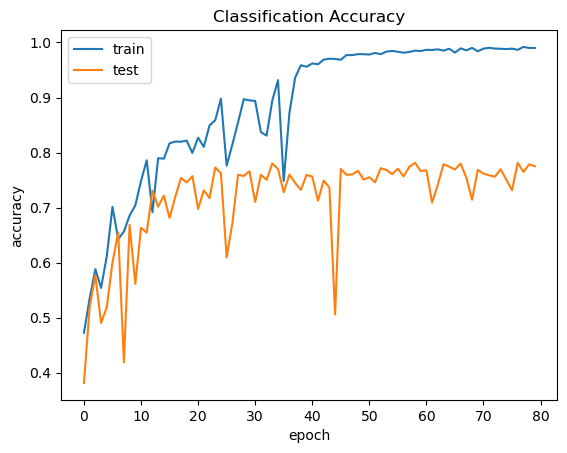

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

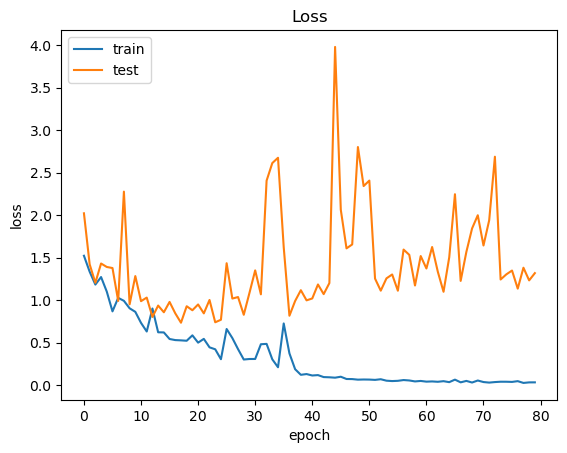

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2.1. Basic CNN Model - FMNIST

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [24]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [25]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

In [26]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [27]:
from keras import layers, models

input_shape = (28, 28, 1)
cnn_seq = models.Sequential()

cnn_seq.add(layers.Conv2D(16, (2,2), padding='same', input_shape=input_shape))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPooling2D((2,2)))

cnn_seq.add(layers.Conv2D(32, (2,2), padding='same'))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPooling2D((2,2)))

cnn_seq.add(layers.Flatten())
cnn_seq.add(layers.Dense(units=128, activation='relu'))
cnn_seq.add(layers.Dense(units=64, activation='relu'))
cnn_seq.add(layers.Dense(units=32, activation='relu'))
cnn_seq.add(layers.Dense(units=10, activation='softmax'))

In [28]:
cnn_seq.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 32)      

In [29]:
history = cnn_seq.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot], epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4142 - accuracy: 0.8541 - val_loss: 0.3450 - val_accuracy: 0.8752
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2822 - accuracy: 0.8961 - val_loss: 0.3192 - val_accuracy: 0.8813
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2431 - accuracy: 0.9121 - val_loss: 0.2736 - val_accuracy: 0.8984
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2167 - accuracy: 0.9206 - val_loss: 0.2574 - val_accuracy: 0.9070
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1948 - accuracy: 0.9287 - val_loss: 0.2666 - val_accuracy: 0.9060
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1778 - accuracy: 0.9354 - val_loss: 0.2568 - val_accuracy: 0.9080
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1606 - accuracy: 0.9401 - val_loss: 0.2700 - val_accuracy

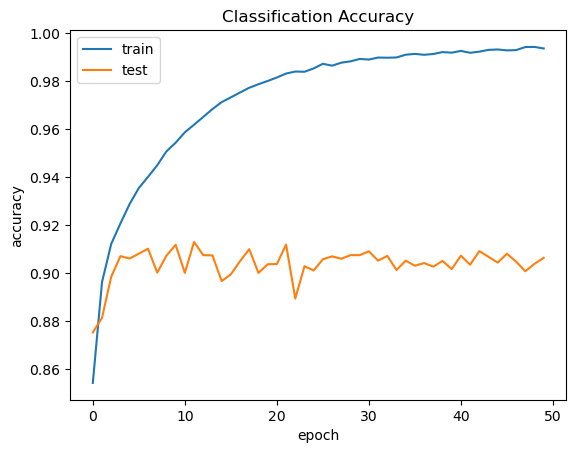

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

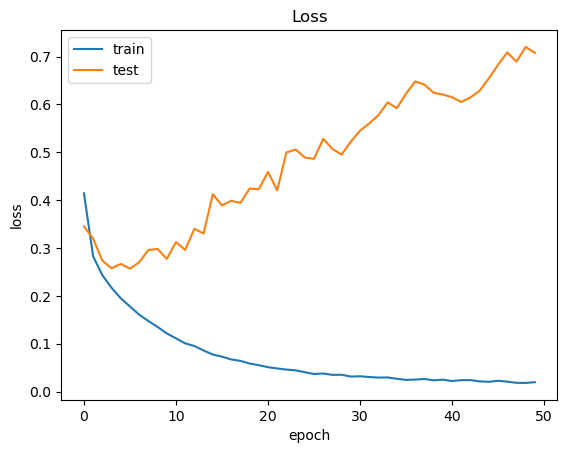

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2.1 CIFAR10 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [36]:
from keras import layers, models

input_shape = (32, 32, 3)
cnn_seq = models.Sequential()

cnn_seq.add(layers.Conv2D(16, (2,2), padding = 'same', input_shape=input_shape))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPooling2D((2,2)))

cnn_seq.add(layers.Conv2D(32, (2,2), padding='same'))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPooling2D((2,2)))

cnn_seq.add(layers.Conv2D(64, (2,2), padding='same'))
cnn_seq.add(layers.BatchNormalization())
cnn_seq.add(layers.Activation('relu'))
cnn_seq.add(layers.MaxPooling2D((2,2)))

cnn_seq.add(layers.Flatten())
cnn_seq.add(layers.Dense(units=128, activation='relu'))
cnn_seq.add(layers.Dense(units=64, activation='relu'))
cnn_seq.add(layers.Dense(units=10, activation='softmax'))

In [37]:
cnn_seq.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_seq.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 32)      

In [38]:
history = cnn_seq.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot], epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.3433 - accuracy: 0.5191 - val_loss: 1.7401 - val_accuracy: 0.4446
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9981 - accuracy: 0.6472 - val_loss: 1.0494 - val_accuracy: 0.6301
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8747 - accuracy: 0.6927 - val_loss: 1.0045 - val_accuracy: 0.6493
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7967 - accuracy: 0.7203 - val_loss: 1.1709 - val_accuracy: 0.6053
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7344 - accuracy: 0.7410 - val_loss: 0.8846 - val_accuracy: 0.7003
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6838 - accuracy: 0.7592 - val_loss: 0.8019 - val_accuracy: 0.7260
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6394 - accuracy: 0.7748 - val_loss: 0.8504 - val_accuracy

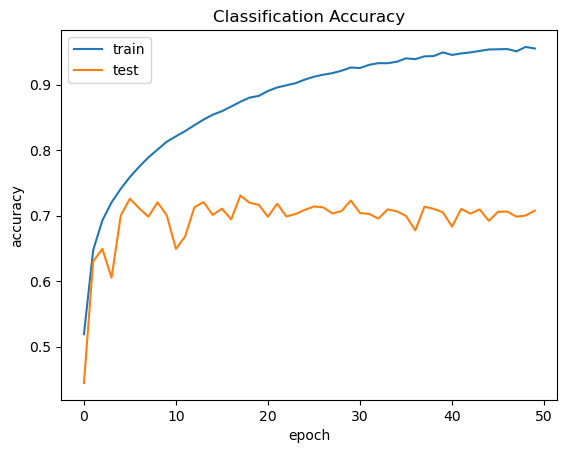

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

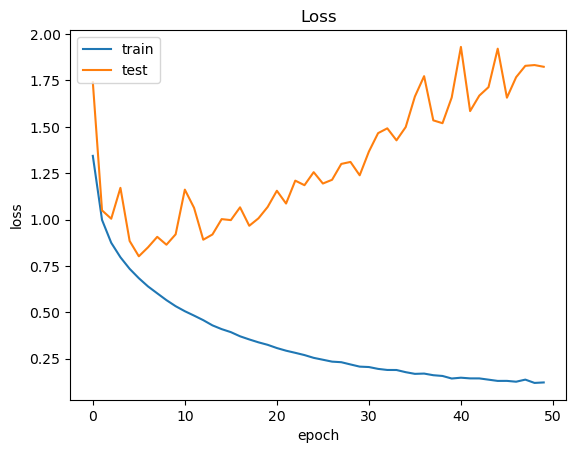

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()